<a href="https://colab.research.google.com/github/MannJadhav/Diabetics-Prediction-Using-Logistics-Regression/blob/main/Diabetics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetics Prediction Using Logistics Regression

In [ ]:
# Install necessary libraries
!pip install -q kaggle


In [ ]:
# Upload kaggle.json (API key) manually in Colab's file section or use the below code to upload manually
from google.colab import files
files.upload()

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"mannjadhav","key":"0d7ede5415cfead1c045082c468749aa"}'}

In [ ]:
# Move kaggle.json to the right directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d kandij/diabetes-dataset
!unzip diabetes-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/kandij/diabetes-dataset
License(s): unknown
  0% 0.00/8.92k [00:00<?, ?B/s]
100% 8.92k/8.92k [00:00<00:00, 17.9MB/s]
Archive:  diabetes-dataset.zip
  inflating: diabetes2.csv           


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load dataset
data = pd.read_csv("diabetes2.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Split features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate the model
# Predict on the test set
y_pred = model.predict(X_test) # This line is crucial, it was missing

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have:
# - X_test: The features of your test data
# - y_test: The true labels of your test data
# - model: Your trained logistic regression model

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')  # Prints accuracy with 2 decimal places

Accuracy: 0.75


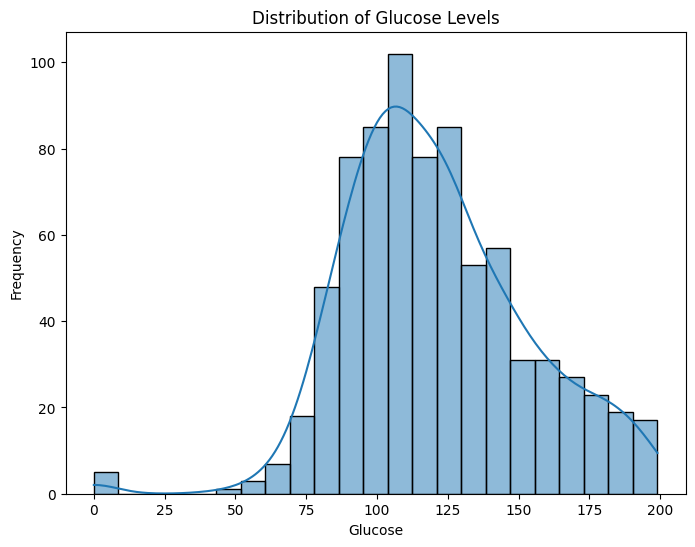

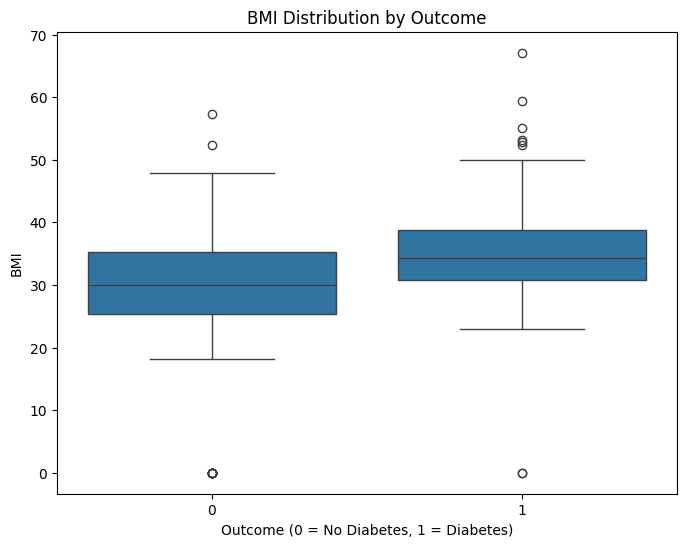

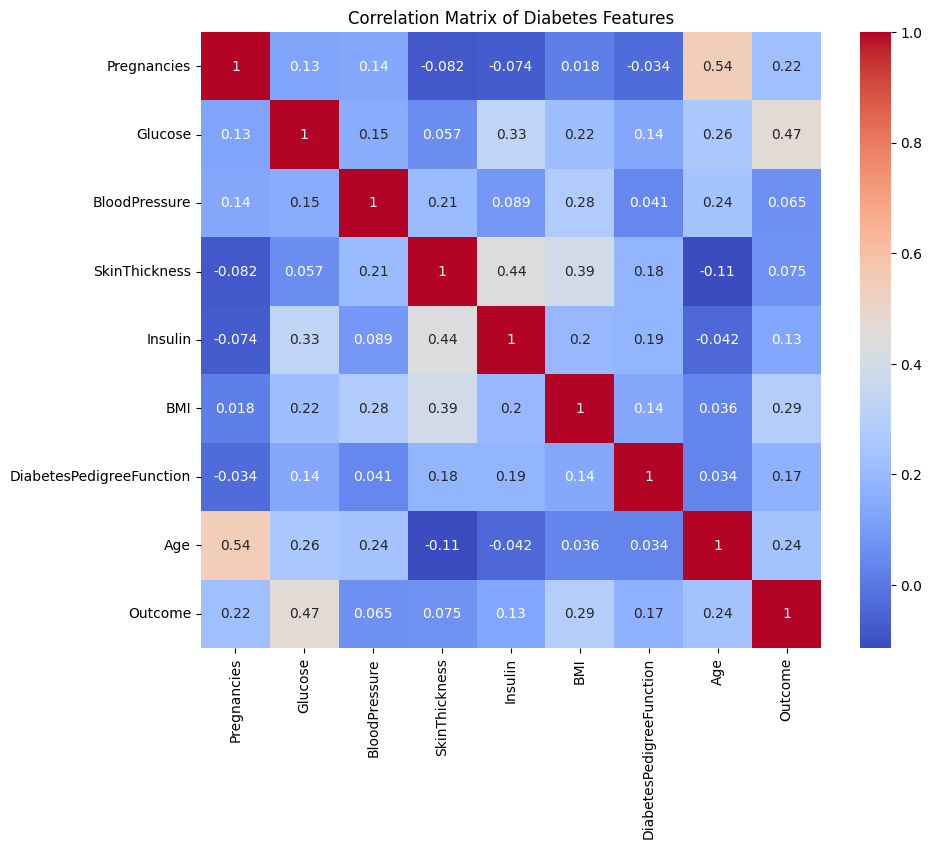

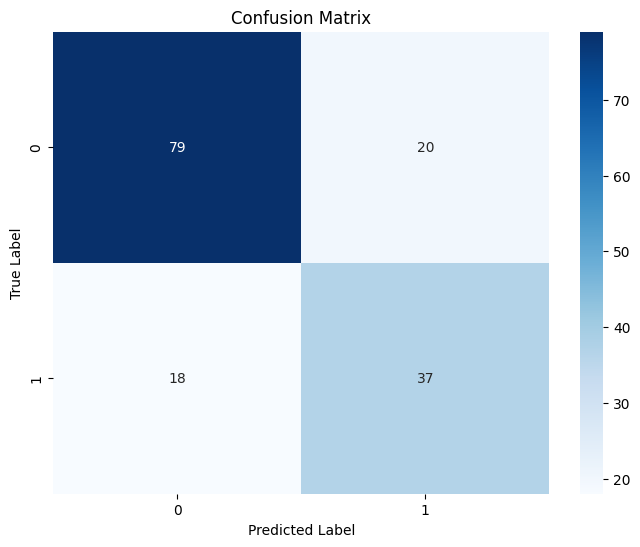

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Visualization ---

# 1. Histogram of a Feature (e.g., Glucose)
plt.figure(figsize=(8, 6))
sns.histplot(data['Glucose'], kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot of a Feature by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('BMI Distribution by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('BMI')
plt.show()

# 3. Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Diabetes Features')
plt.show()

# --- Model Visualization (Confusion Matrix) ---

from sklearn.metrics import confusion_matrix

# Assuming you have already calculated y_pred

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import joblib # Import the joblib library

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl
